## IIc- Re-assigning labels to each eye-fundi

Now that the dataset has been pre-preocessed, I will :
- identify the correspondance between <i>diagnositic keywords</i> and <i>labels</i>,
- properly re-assign each eye-fundi with its <i>label</i>.


In [1]:
import pandas as pd
import numpy as np
df_ori=pd.read_csv('Temp_df.csv', index_col=[0])
df=pd.read_csv('Temp2_df.csv', index_col=[0])
df.head()

,ID,Patient Age,Patient Sex,Fundus,Diagnostic Keywords,N,D,G,C,A,H,M,O,Labels,Keywords
0,0,69,Female,0_left.jpg,cataract,0,0,0,1,0,0,0,0,Cataract,cataract
0,0,69,Female,0_right.jpg,normal fundus,0,0,0,1,0,0,0,0,Cataract,normal fundus
1,1,57,Male,1_left.jpg,normal fundus,1,0,0,0,0,0,0,0,Normal,normal fundus
1,1,57,Male,1_right.jpg,normal fundus,1,0,0,0,0,0,0,0,Normal,normal fundus
2,2,42,Male,2_left.jpg,laser spot，moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,Diabetes-Others,laser spot


### A. Diagnostic keywords and labels correspondance

As seen previously, the original dataset contained 37 label combinations and 94 diagnostic keywords.

In [5]:
print('\nThere are now',len(df["Labels"].unique()),'label combinations and',len(df["Keywords"].unique()),'diagnostic keywords')


There are now 12 label combinations and 37 diagnostic keywords


Identifying which <i>diagnositic keywords</i> is associated to which <i>label</i> is needed to properly reassign each eye fundi with its proper <i>label(s)</i> based on its <i>diagnositic keyword(s)</i>. 

To do so, I can either look at which:
- <i>diagnositic keyword(s)</i> associated with each <i>label</i> (table 1 below)
- <i>label(s)</i> associated with each <i>diagnositic keyword</i> (table 2 below)

The idea is to cross-compare the list of <i>labels</i> and/or <i>diagnositic keywords</i> to identify unique terms they each are associated with. 

Given that there are more <i>diagnositic keywords</i> than <i>label</i> , I decide to check the list of <i>diagnositic keyword</i> associated to each label.

In [8]:
# Check the list of diagnostic keywords associated to each label 

## OPTIONAL : Table 1 to look at which diagnostic keywords are associated with each of the 12 label combination:
#Lab2Keyw=df.groupby('Labels')['Keywords'].unique().apply(list).reset_index()
#pd.options.display.max_colwidth = 500
#print("\033[1mTABLE 1\033[0m")
#Lab2Keyw

## OPTIONAL : Table 2 to look at which label & label combination associated with each of the 37 diagnostic keywords:
#Keyw2Lab=df_pproc.groupby('Keywords')['Labels'].unique().apply(list).reset_index()
#pd.options.display.max_colwidth = 200
#print("\033[1mTABLE 2\033[0m")
#Keyw2Lab

## CHOSEN METHOD:
# Identify all diagnostic keywords associated to each label 
N=df['Keywords'][df['Labels'] == 'Normal'].value_counts(normalize=True).round(4).reset_index().set_index('index')*100
D=df['Keywords'][df['Labels'] == 'Diabetes'].value_counts(normalize=True).round(4).reset_index().set_index('index')*100
M=df['Keywords'][df['Labels'] == 'Myopia'].value_counts(normalize=True).round(4).to_frame().reset_index().set_index('index')*100
G=df['Keywords'][df['Labels'] == 'Glaucoma'].value_counts(normalize=True).round(4).to_frame().reset_index().set_index('index')*100
C=df['Keywords'][df['Labels'] == 'Cataract'].value_counts(normalize=True).round(4).to_frame().reset_index().set_index('index')*100
A=df['Keywords'][df['Labels'] == 'AMD'].value_counts(normalize=True).round(4).to_frame().reset_index().set_index('index')*100
H=df['Keywords'][df['Labels'] == 'Hypertension'].value_counts(normalize=True).round(4).to_frame().reset_index().set_index('index')*100
O=df['Keywords'][df['Labels'] == 'Others'].value_counts(normalize=True).round(4).to_frame().reset_index().set_index('index')*100
DO=df['Keywords'][df['Labels'] == 'Diabetes-Others'].value_counts(normalize=True).round(4).to_frame().reset_index().set_index('index')*100
DH=df['Keywords'][df['Labels'] == 'Diabetes-Hypertension'].value_counts(normalize=True).round(4).to_frame().reset_index().set_index('index')*100
MO=df['Keywords'][df['Labels'] == 'Myopia-Others'].value_counts(normalize=True).round(4).to_frame().reset_index().set_index('index')*100
GO=df['Keywords'][df['Labels'] == 'Glaucoma-Others'].value_counts(normalize=True).round(4).to_frame().reset_index().set_index('index')*100

# Show examples:
print("\033[1mDiagnostic keywords related to Normal (Label N) :\n\033[0m", N, '\n\n')
print("\n\033[1mDiagnostic keywords related to Diabetes (Label D) :\n\033[0m", D, '\n\n')
print("\n\033[1mDiagnostic keywords related to Glaucoma (Label G) :\n\033[0m", G, '\n\n')
print("\n\033[1mDiagnostic keywords related to Cataract (Label C) :\n\033[0m", C, '\n\n')
print("\n\033[1mDiagnostic keywords related to Age-related macular degeneration (Label A) :\n\033[0m", A, '\n\n')
print("\n\033[1mDiagnostic keywords related to Myopia (Label M) :\n\033[0m", M, '\n\n')
print("\n\033[1mDiagnostic keywords related to Hypertension (Label H) :\n\033[0m", H, '\n\n')
print("\n\033[1mDiagnostic keywords related to Others (Label O) :\n\033[0m", O)

Diagnostic keywords related to Normal (Label N) :
                    Keywords
index                      
normal fundus         91.01
lens dust              8.87
low image quality      0.12 



Diagnostic keywords related to Diabetes (Label D) :
                                         Keywords
index                                           
moderate non proliferative retinopathy     44.96
mild nonproliferative retinopathy          27.59
normal fundus                              14.77
severe nonproliferative retinopathy        10.23
low image quality                           1.15
proliferative diabetic retinopathy          1.01
diabetic retinopathy                        0.29 



Diagnostic keywords related to Glaucoma (Label G) :
                     Keywords
index                       
glaucoma               75.72
normal fundus          16.05
suspected glaucoma      5.76
lens dust               2.47 



Diagnostic keywords related to Cataract (Label C) :
                Keywords

<br>We can already see that some diagnostic keywords, such as 'normal fundus' or 'lens dust', are present across labels and needs to be addressed

We also see that some keywords seem obvious, such as the ones associated with the label "AMD" that can be either 'wet-' or 'dry-' 'age-related macular degeneration'.

Same with the label "Glaucoma" is associated with both 'glaucoma' and 'suspected glaucoma' terms.

However we can also see that even though 'retinopathy' seems to be highly specific of the label 'Diabetes', this term is also found in the label 'Myopia' under the diagnostic keywords 'myopic retinopathy' 

<i> --> This observation shows that it is essential to exercise caution when reassigning the labels to the diagnostic keywords.</i>

Based on the rules regarding the label assignation  <i>(see README.md)</i>, we also already know that the label N is <u>strictly</u> associated with the <i>diagnostic keyword</i> "normal fundus".

We also know that the label 'Others' is a catch-all term for non-label-related <i>diagnostic keywords</i> or technics-related keywords.

To correctly assign each <i>diagnostic keywords</i> to their <i>label</i>, I choose to create lists where all terms re-assigned to 'Normal' and 'Others' will be removed. 

In [11]:
# Create 'drop' list with all terms to assign to 'Others'
drop=['lens dust','low image quality']
# Remove terms in 'drop' list from the list of each single and combined label:
N = N[~N.index.isin(drop)]
D = D[~D.index.isin(drop)]
G = G[~G.index.isin(drop)]
C = C[~C.index.isin(drop)]
A = A[~A.index.isin(drop)]
M = M[~M.index.isin(drop)]
H = H[~H.index.isin(drop)]
DO = DO[~DO.index.isin(drop)]
DH = DH[~DH.index.isin(drop)]
MO = MO[~MO.index.isin(drop)]
GO = GO[~GO.index.isin(drop)]

# Same with the term 'normal fundus' that will be assigned to 'Normal':
drop2=['normal fundus']
# Remove terms in 'drop2' list from the list of each single and combined label:
D = D[~D.index.isin(drop2)]
G = G[~G.index.isin(drop2)]
C = C[~C.index.isin(drop2)]
A = A[~A.index.isin(drop2)]
M = M[~M.index.isin(drop2)]
H = H[~H.index.isin(drop2)]
O = O[~O.index.isin(drop2)]
DO = DO[~DO.index.isin(drop2)]
DH = DH[~DH.index.isin(drop2)]
MO = MO[~MO.index.isin(drop2)]
GO = GO[~GO.index.isin(drop2)]

In order to visualize the results and assess potentiel remaining overlap of terms across <i>labels</i>, I use Venn diagram to picture the logical relation between <i>labels</i> and the distribution of the <i>diagnostic keywords</i> accross these <i>labels</i>.

/var/folders/d1/v_4lh9nx1g1dpy1kd_w18nl40000gn/T/ipykernel_26410/941308238.py:11: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(hspace=0.1,wspace=0.1)


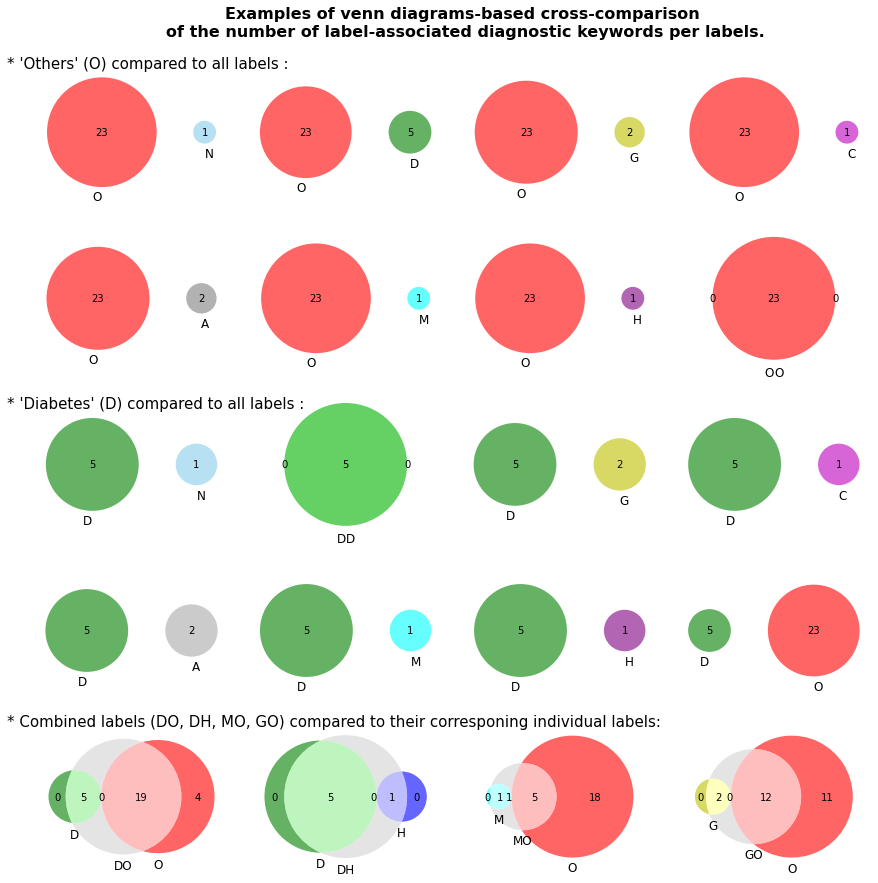

In [12]:
# Import 
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib_venn import venn2
from matplotlib_venn import venn3
import seaborn as sns

# Visualization (Venn Diagrams)
# Set layout:
fig, ax = plt.subplots(5,4,figsize=(15,15), constrained_layout=True)
fig.subplots_adjust(hspace=0.1,wspace=0.1)
# Set design:
plt.title('Examples of venn diagrams-based cross-comparison \nof the number of label-associated diagnostic keywords per labels.', x= -1.15, y= 5.5, fontsize=16, fontweight="bold")
plt.figtext(0.1, 0.87, "* 'Others' (O) compared to all labels :", ha='left', fontsize= 15)
# Plot data of interest (here the label 'Others' versus all other labels:
venn2([set(O.index), 
       set(N.index)],
       set_labels=('O', 'N'),set_colors=('r', 'skyblue'), normalize_to=0.6,ax=ax[0, 0], alpha=0.6)
venn2([set(O.index), 
       set(D.index)],
       set_labels=('O', 'D'),set_colors=('r', 'g'), normalize_to=0.6, ax=ax[0, 1], alpha=0.6)
venn2([set(O.index), 
       set(G.index)],
       set_labels=('O', 'G'),ax=ax[0, 2], normalize_to=0.6, set_colors=('r', 'y'), alpha=0.6)
venn2([set(O.index), 
       set(C.index)],
       set_labels=('O', 'C'),ax=ax[0, 3], normalize_to=0.6, set_colors=('r', 'm'), alpha=0.6)     
venn2([set(O.index), 
       set(A.index)],
       set_labels=('O', 'A'),ax=ax[1, 0], normalize_to=0.6, set_colors=('r', 'gray'), alpha=0.6)      
venn2([set(O.index), 
       set(M.index)],
       set_labels=('O', 'M'),ax=ax[1, 1], normalize_to=0.6, set_colors=('r', 'cyan'), alpha=0.6)      
venn2([set(O.index), 
       set(H.index)],
       set_labels=('O', 'H'),ax=ax[1, 2], normalize_to=0.6, set_colors=('r', 'purple'), alpha=0.6)
venn2([set(O.index), 
       set(O.index)],
       set_labels=('O', 'O'),ax=ax[1, 3], normalize_to=0.6, set_colors=('r', 'r'), alpha=0.6)

# Plot data of interest (here the label 'Diabetes' versus all other labels:
plt.figtext(0.1, 0.555, "* 'Diabetes' (D) compared to all labels :", ha='left', fontsize= 15)
venn2([set(D.index), 
       set(N.index)],
       set_labels=('D', 'N'),ax=ax[2, 0], normalize_to=0.6, set_colors=('g', 'skyblue'), alpha=0.6)
venn2([set(D.index), 
       set(D.index)],
       set_labels=('D', 'D'),set_colors=('g', 'g'), normalize_to=0.6, ax=ax[2, 1], alpha=0.6)
venn2([set(D.index), 
       set(G.index)],
       set_labels=('D', 'G'),ax=ax[2, 2], normalize_to=0.6, set_colors=('g', 'y'), alpha=0.6)
venn2([set(D.index), 
       set(C.index)],
       set_labels=('D', 'C'),ax=ax[2, 3], normalize_to=0.6, set_colors=('g', 'm'), alpha=0.6)     
venn2([set(D.index), 
       set(A.index)],
       set_labels=('D', 'A'),ax=ax[3, 0], normalize_to=0.6, set_colors=('g', 'darkgray'), alpha=0.6)      
venn2([set(D.index), 
       set(M.index)],
       set_labels=('D', 'M'),ax=ax[3, 1], normalize_to=0.6, set_colors=('g', 'cyan'), alpha=0.6)
venn2([set(D.index), 
       set(H.index)],
       set_labels=('D', 'H'),ax=ax[3, 2], normalize_to=0.6, set_colors=('g', 'purple'), alpha=0.6)
venn2([set(D.index), 
       set(O.index)],
       set_labels=('D', 'O'),ax=ax[3, 3], normalize_to=0.6, set_colors=('g', 'r'), alpha=0.6)

# Use Venn3 to allow for visualization of combined labels versus their single corresponding counterparts:
plt.figtext(0.1, 0.26, "* Combined labels (DO, DH, MO, GO) compared to their corresponing individual labels:", ha='left', fontsize= 15)
venn3([set(D.index), 
       set(O.index),
       set(DO.index)],
       set_labels=('D', 'O', 'DO',), set_colors=('g', 'r','lightgray'), normalize_to=0.6, ax=ax[4, 0], alpha=0.6)
venn3([set(D.index), 
       set(H.index),
       set(DH.index)],
       set_labels=('D', 'H', 'DH',), set_colors=('g', 'b','lightgray'), normalize_to=0.6, ax=ax[4, 1], alpha=0.6)
venn3([set(M.index), 
       set(O.index),
       set(MO.index)],
       set_labels=('M', 'O', 'MO',), set_colors=('cyan', 'r','lightgray'), normalize_to=0.6, ax=ax[4, 2], alpha=0.6)
venn3([set(G.index), 
       set(O.index),
       set(GO.index)],
       set_labels=('G', 'O', 'GO',), set_colors=('y', 'r','lightgray'), normalize_to=0.6, ax=ax[4, 3], alpha=0.6)

# Show plot:
plt.show();


Playing around with this type of visualization is another way for me to check whether each <i>diagnostic keywords</i> have been properly identified and specifically associated with its individual <i>label</i>.

However, when looking at the combined labels (DO, DH, GO, MO), the Venn diagrams show that 1 <i>diagnostic keyword</i> is still exclusively associated with the combination MO. 

I now identify this <i>diagnostic keyword</i>. Doing so, I also check that I didn't miss anything with the other combined labels. 

In [13]:
# Identify diagnostic keywords exclusively associated with label combinations:

# Remove all keywords specific to each individual counterparts of the combined labels:
dropDO=list(D.index.union(O.index))
# List all remaining keywords associated to the combined labels:
DO = DO[~DO.index.isin(dropDO)]

#Repeat the process for other combined labels
dropDH=list(D.index.union(H.index))
DH = DH[~DH.index.isin(dropDH)]

dropGO=list(G.index.union(O.index))
GO = GO[~GO.index.isin(dropGO)]

dropMO=list(M.index.union(O.index))
MO = MO[~MO.index.isin(dropMO)]

# Results:
print("\n\033[1mDiagnostic keywords related to 'Diabetes-Others' (Label DO) :\n\033[0m", DO)
print("\n\033[1mDiagnostic keywords related to 'Diabetes-Hypertension' (Label DH) :\n\033[0m", DH)
print("\n\033[1mDiagnostic keywords related to 'Glaucoma-Others' (Label GO) :\n\033[0m", GO)
print("\n\033[1mDiagnostic keywords related to 'Myopia-Others' (Label MO) :\n\033[0m", MO)


Diagnostic keywords related to 'Diabetes-Others' (Label DO) :
 Empty DataFrame
Columns: [Keywords]
Index: []

Diagnostic keywords related to 'Diabetes-Hypertension' (Label DH) :
 Empty DataFrame
Columns: [Keywords]
Index: []

Diagnostic keywords related to 'Glaucoma-Others' (Label GO) :
 Empty DataFrame
Columns: [Keywords]
Index: []

Diagnostic keywords related to 'Myopia-Others' (Label MO) :
                        Keywords
index                          
peripapillary atrophy     16.67



<br>The <i>diagnostic keyword</i> specific to the label combination MO is : 'peripapillary atrophy'. 

A quick online research showed that this term seems to not be specific of Myopia : 
<br><i>"Peripapillary atrophy (PPA) is a clinical finding associated with chorioretinal thinning and disruption of the retinal pigment epithelium (RPE) in the area surrounding the optic disc. It is non-specific and can occur in both benign and pathologic conditions, including glaucoma and high myopia."</i>(Manjunath <i>et al.</i>, Ophthalmology. 2011)

With such information in mind, I want to double-check that in this specific dataset, this keyword has been used for other diseases such as Glaucoma. 

In order to determine this, I check which label(s) is associated with this keyword :

In [14]:
Keyw2Lab=df.groupby('Keywords')['Labels'].unique().apply(list).reset_index()
pd.options.display.max_colwidth = 500
Keyw2Lab.loc[Keyw2Lab.Keywords=='peripapillary atrophy']

,Keywords,Labels
22,peripapillary atrophy,[Myopia-Others]


This <i>diagnostic keyword</i> is only found associated with the combinedlabels MO.

Without an expert opinion on it, I decided to associate this term to 'Myopia'.

Now I can check which  are associated with which <i>label</i> and make sure that :
1) every <i>diagnostic keyword</i> are unique to one given <i>label</i>
2) there are no longer any <i>diagnostic keywords</i> associated with the label combinations DO, DH, GO, MO.

In [15]:
## The keywords 'lens dust', 'low quality image', 
## 'optic disk photographically invisible' and 'normal fundus' 
## have already been adresse above

## Drop 'peripapillary atrophy' from the labels 
## "Others" and "Myopia-Others" 
dropPPA=['peripapillary atrophy']
O = O[~O.index.isin(dropPPA)]

## Now remove all keywords within the 'Others" label
dropO=list(O.index)
N = N[~N.index.isin(dropO)]
D = D[~D.index.isin(dropO)]
G = G[~G.index.isin(dropO)]
C = C[~C.index.isin(dropO)]
A = A[~A.index.isin(dropO)]
M = M[~M.index.isin(dropO)]
H = H[~H.index.isin(dropO)]
N = N[~N.index.isin(dropO)]

## In combined labels, drop all keywords 
## already assigned to individual labels
dropD=list(D.index)
dropH=list(H.index)
dropG=list(G.index)

DO = DO[~DO.index.isin(dropO)]
DO = DO[~DO.index.isin(dropD)]

DH = DH[~DH.index.isin(dropO)]
DH = DH[~DH.index.isin(dropD)]
DH = DH[~DH.index.isin(dropH)]

GO = GO[~GO.index.isin(dropO)]
GO = GO[~GO.index.isin(dropG)]

MO = MO[~MO.index.isin(dropO)]
#print("MO minus O :",MO)      # Verification

## Assign 'peripapillary atrophy' to the label "Myopia" ... 
#print("\nM alone :",M) # Verification
M=pd.concat([M,MO], axis=0)
#print("\nM with PPA :", M)      # Verification

## ... and remove it from the label "Myopia-Others" 
dropM=list(M.index)
MO = MO[~MO.index.isin(dropM)]
#print("\nMO minus PPA :", MO)      # Verification

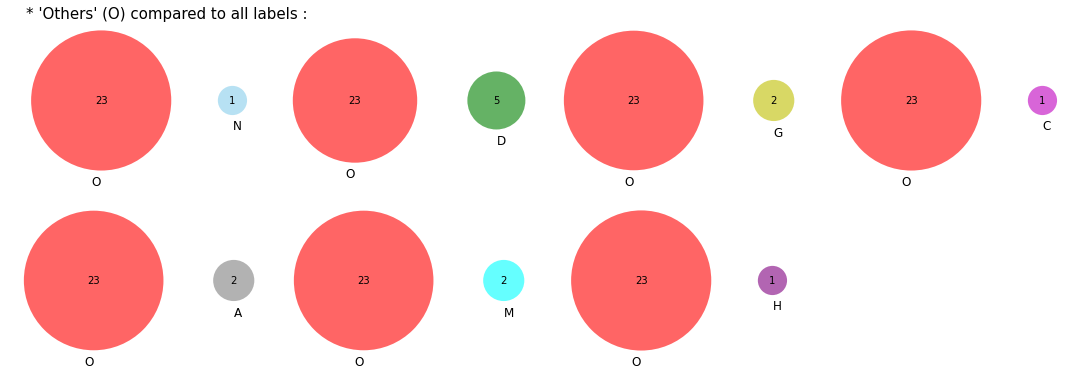


N:                Keywords
index                  
normal fundus     91.01

D:                                         Keywords
index                                           
moderate non proliferative retinopathy     44.96
mild nonproliferative retinopathy          27.59
severe nonproliferative retinopathy        10.23
proliferative diabetic retinopathy          1.01
diabetic retinopathy                        0.29

G:                     Keywords
index                       
glaucoma               75.72
suspected glaucoma      5.76

C:           Keywords
index             
cataract     72.98

A:                                       Keywords
index                                         
dry age-related macular degeneration     77.78
wet age-related macular degeneration     14.53

M:                        Keywords
index                          
pathological myopia       85.85
peripapillary atrophy     16.67

H:                           Keywords
index                            

In [16]:
# Visualization (Venn Diagrams)
# 'Others' being the label with the most keywords associated with, 
# I decide to compare all labels to it.

fig, ax = plt.subplots(2,4,figsize=(15,5), constrained_layout=True)
plt.figtext(0.02, 0.98, "* 'Others' (O) compared to all labels :", ha='left', fontsize= 15)

venn2([set(O.index), 
       set(N.index)],
       set_labels=('O', 'N'),set_colors=('r', 'skyblue'), normalize_to=0.6,ax=ax[0, 0], alpha=0.6)
venn2([set(O.index), 
       set(D.index)],
       set_labels=('O', 'D'),set_colors=('r', 'g'), normalize_to=0.6, ax=ax[0, 1], alpha=0.6)
venn2([set(O.index), 
       set(G.index)],
       set_labels=('O', 'G'),ax=ax[0, 2], normalize_to=0.6, set_colors=('r', 'y'), alpha=0.6)
venn2([set(O.index), 
       set(C.index)],
       set_labels=('O', 'C'),ax=ax[0, 3], normalize_to=0.6, set_colors=('r', 'm'), alpha=0.6)     
venn2([set(O.index), 
       set(A.index)],
       set_labels=('O', 'A'),ax=ax[1, 0], normalize_to=0.6, set_colors=('r', 'gray'), alpha=0.6)      
venn2([set(O.index), 
       set(M.index)],
       set_labels=('O', 'M'),ax=ax[1, 1], normalize_to=0.6, set_colors=('r', 'cyan'), alpha=0.6)      
venn2([set(O.index), 
       set(H.index)],
       set_labels=('O', 'H'),ax=ax[1, 2], normalize_to=0.6, set_colors=('r', 'purple'), alpha=0.6)
ax_last=ax[1, 3]
ax_last.set_visible(False)
plt.show(); 

## Verification step
print("\nN:",N)
print("\nD:",D)
print("\nG:",G)
print("\nC:",C)
print("\nA:",A)
print("\nM:",M)
print("\nH:",H)
print("\nO:",O)
print("\nDO:",DO)
print("\nDH:",DH)
print("\nGO:",GO)
print("\nMO:",MO)

### B. Assigning each eye-fundi with its correponding <i>label</i> based on their <i>diagnostic keyword(s)</i>. 

In [17]:
## Drop former columns no longer needed
dataframe=df.drop(['Diagnostic Keywords','Labels', 'N','D','G','C','A','H','M','O'],axis=1)

# Assign each eye-fundi with its corresponding label value
dataframe['N'] = dataframe['Keywords'].apply(lambda x: 1 if x in N.index else 0)
dataframe['D'] = dataframe['Keywords'].apply(lambda x: 1 if x in D.index else 0)
dataframe['G'] = dataframe['Keywords'].apply(lambda x: 1 if x in G.index else 0)
dataframe['C'] = dataframe['Keywords'].apply(lambda x: 1 if x in C.index else 0)
dataframe['A'] = dataframe['Keywords'].apply(lambda x: 1 if x in A.index else 0)
dataframe['M'] = dataframe['Keywords'].apply(lambda x: 1 if x in M.index else 0)
dataframe['H'] = dataframe['Keywords'].apply(lambda x: 1 if x in H.index else 0)
dataframe['O'] = dataframe['Keywords'].apply(lambda x: 1 if x in O.index else 0)

# Optional
dataframe=dataframe.rename({'Keywords': 'Diagnostic Keywords'}, axis=1)

# Verification Step 
dataframe=dataframe.assign(Pooled_labels=dataframe[['N','D','G', 'C','A', 'H', 'M', 'O']].apply(lambda row:''.join([str(each) for each in row]),axis=1))
print("There is",len(pd.unique(dataframe['Pooled_labels'])),"label combination total") 

There is 8 label combination total


Considering that these 8 <i>labels</i> should be each individual labels, I rename them accordingly and assess their weight: 

In [18]:
# We can rename the labels accordingly : 
my_dict= {'10000000':'Normal', '01000000':'Diabetes', '00000001':'Others', '00010000':'Cataract', 
          '00100000':'Glaucoma','00001000':'AMD', '00000010':'Myopia','00000100':'Hypertension'}
dataframe['Labels']=dataframe['Pooled_labels'].replace(my_dict)

# Drop Pooled_labels column freshly created
dataframe=dataframe.drop(['Pooled_labels'],axis=1)

print('\033[1m\nDistribution of each label combinations:\033[0m')
Comb_labl1=pd.DataFrame(dataframe['Labels'].value_counts(normalize=True).round(4)*100)
pd.set_option('display.max_columns', None)
Comb_labl1


Distribution of each label combinations:


,Labels
Normal,42.09
Diabetes,22.57
Others,20.48
Glaucoma,3.31
Myopia,3.30
Cataract,3.20
AMD,2.94
Hypertension,2.11


I now have the desired fundi-based dataset where each row corresponds to one eye fundus and its related info

In [19]:
# dataframe.shape
dataframe.head(15)

,ID,Patient Age,Patient Sex,Fundus,Diagnostic Keywords,N,D,G,C,A,M,H,O,Labels
0,0,69,Female,0_left.jpg,cataract,0,0,0,1,0,0,0,0,Cataract
0,0,69,Female,0_right.jpg,normal fundus,1,0,0,0,0,0,0,0,Normal
1,1,57,Male,1_left.jpg,normal fundus,1,0,0,0,0,0,0,0,Normal
1,1,57,Male,1_right.jpg,normal fundus,1,0,0,0,0,0,0,0,Normal
2,2,42,Male,2_left.jpg,laser spot,0,0,0,0,0,0,0,1,Others
2,2,42,Male,2_left.jpg,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,Diabetes
2,2,42,Male,2_right.jpg,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,Diabetes
3,3,66,Male,3_left.jpg,normal fundus,1,0,0,0,0,0,0,0,Normal
4,4,53,Male,4_left.jpg,macular epiretinal membrane,0,0,0,0,0,0,0,1,Others
4,4,53,Male,4_right.jpg,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,Diabetes


In [20]:
dataframe.shape

(7343, 14)

Finally, as mention in the "README.md" file, some pictures have background issues. 

I therefore decide to discard them.


In [21]:
drop_values = ['2174_right.jpg', '2175_left.jpg','2176_left.jpg','2177_left.jpg','2177_right.jpg','2178_right.jpg','2179_left.jpg','2179_right.jpg','2180_left.jpg','2180_right.jpg','2181_left.jpg','2181_right.jpg','2182_left.jpg','2182_right.jpg','2957_left.jpg','2957_right.jpg']
dataframe=dataframe[~dataframe['Fundus'].str.contains('|'.join(drop_values))]

In [22]:
dataframe.shape

(7326, 14)

In [24]:
## Save dataframe :
dataframe.to_csv('dataframe_ODIR.csv')

### NOTA BENE: 

<b>We see here that processing <i>diagnostic keywords</i> and <i>labels</i> has to be carefully done.

<b>Indeed, by choosing to have a patient-based dataset over a fundus-based one, the disease-related information of both patient's fundi were mixed together.
    
<b>Sorting them out, considering also the technical biais and the extensive list of medical terms, should be done under the scrutiny of an expert opinion. 
    
<b>This is extremely import as the information our models will be fed with has to be clinically relevant for further development of the model.